# The evolution of Trust using pairwise imitation update

In [ ]:
!pip install -q -r https://raw.githubusercontent.com/Socrats/ic2s2-tutorial/refs/heads/main/requirment.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

%matplotlib inline

In [2]:
import egttools as egt

In [3]:
from egttools.plotting.simplified import plot_replicator_dynamics_in_simplex

## Part 1: Infinite populations

In [4]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.TFT()]

In [5]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [6]:
A = np.array([
    [0, 3],
    [-1, 2]
])

In [7]:
nb_rounds = 5

In [8]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [9]:
game.expected_payoffs()

array([[ 2. , -1. ,  2. ],
       [ 3. ,  0. ,  0.6],
       [ 2. , -0.2,  2. ]])

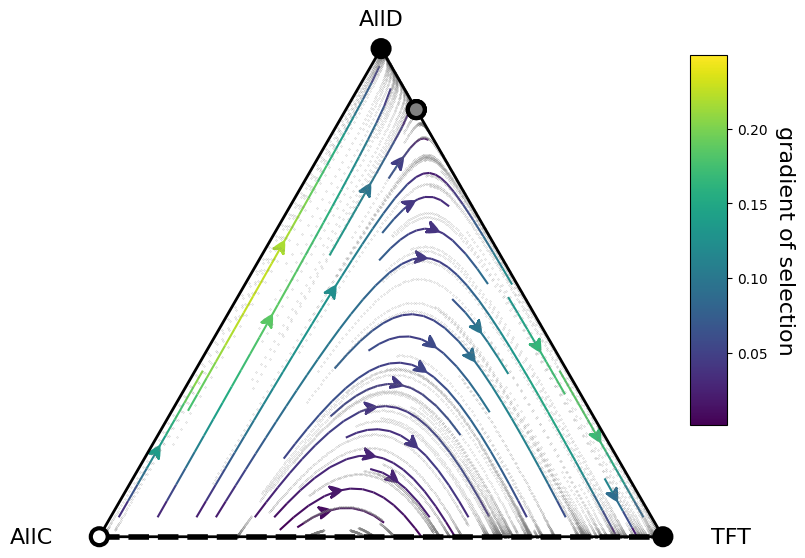

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

simplex, gradients, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(game.expected_payoffs(), ax=ax)

plot = (simplex.draw_triangle()
           .draw_gradients(density=1)
           .add_colorbar(label='gradient of selection')
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.12)
           .draw_stationary_points(roots_xy, stability)
#            .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 
#                                        roots,
#                                        stability,
#                                        trajectory_length=30,
#                                        linewidth=0.1,
#                                        step=0.01,
#                                        color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 100, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

In [11]:
nb_rounds = 100

In [12]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [13]:
game.expected_payoffs()

array([[ 2.  , -1.  ,  2.  ],
       [ 3.  ,  0.  ,  0.03],
       [ 2.  , -0.01,  2.  ]])

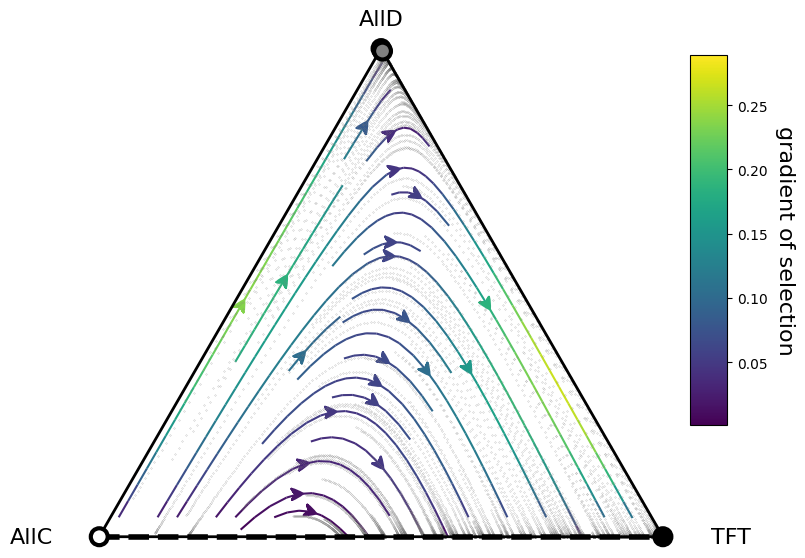

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

simplex, gradients, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(game.expected_payoffs(), ax=ax)

plot = (simplex.draw_triangle()
           .draw_gradients(density=1)
           .add_colorbar(label='gradient of selection')
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.12)
           .draw_stationary_points(roots_xy, stability)
#            .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 
#                                        roots,
#                                        stability,
#                                        trajectory_length=50,
#                                         linewidth=0.1,
#                                        step=0.01,
#                                        color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 100, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

## Part 2: small mutation limit

In [15]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.TFT(), 
              egt.behaviors.NormalForm.TwoActions.GRIM(), 
              egt.behaviors.NormalForm.TwoActions.Detective()]

In [16]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [17]:
nb_rounds = 100

In [18]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [19]:
game.expected_payoffs()

array([[ 2.  , -1.  ,  2.  ,  2.  , -0.91],
       [ 3.  ,  0.  ,  0.03,  0.03,  0.09],
       [ 2.  , -0.01,  2.  ,  2.  ,  1.98],
       [ 2.  , -0.01,  2.  ,  2.  ,  0.07],
       [ 2.97, -0.03,  1.98,  0.03,  1.98]])

### Part 2.1: Effect of $\beta$

In [20]:
Z = 100
beta = 0.1

evolver = egt.analytical.PairwiseComparison(Z, game)

In [21]:
transition_matrix, fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta)

In [22]:
transition_matrix, fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix.transpose())

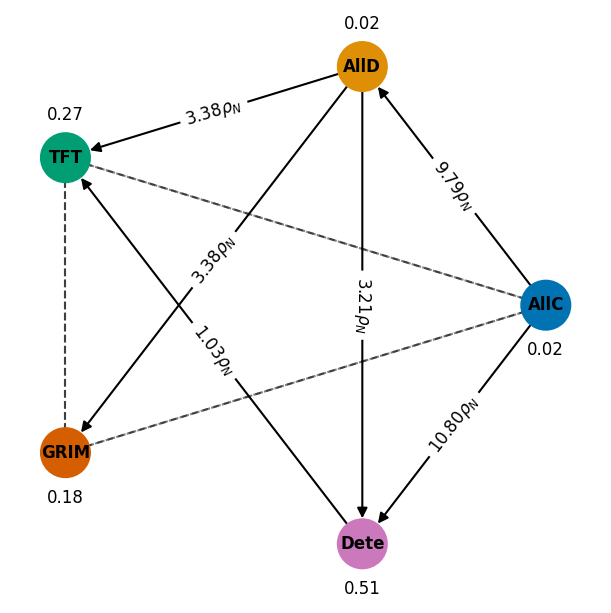

In [23]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_invasion_diagram(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

In [24]:
Z = 100
beta = 10

In [25]:
transition_matrix, fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix.transpose())

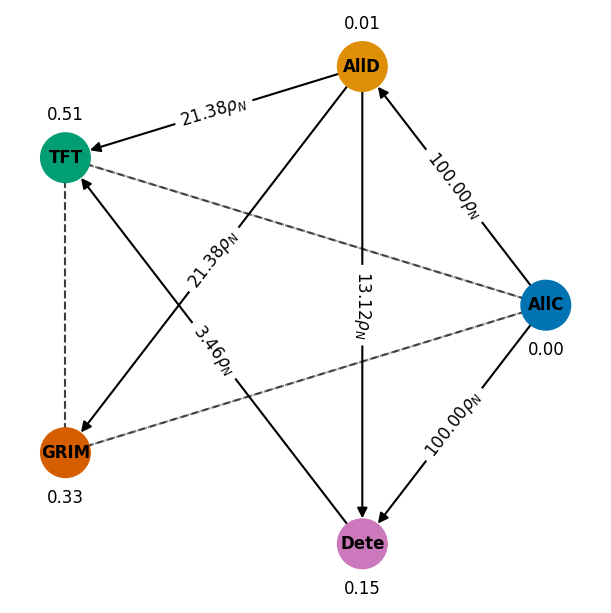

In [26]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_invasion_diagram(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

### Part 2.2 Effect of $Z$

In [27]:
Z = 30
beta = 10

evolver = egt.analytical.PairwiseComparison(Z, game)

In [28]:
transition_matrix, fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix.transpose())

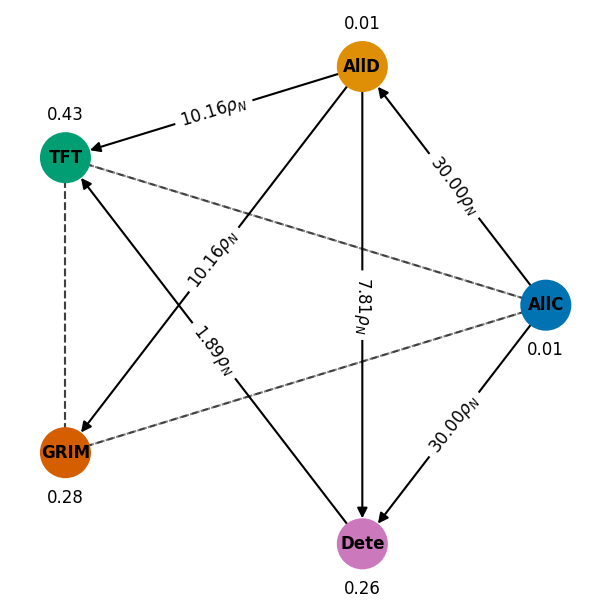

In [29]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_invasion_diagram(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

In [30]:
Z = 50
beta = 10

evolver = egt.analytical.PairwiseComparison(Z, game)

In [31]:
transition_matrix, fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix.transpose())

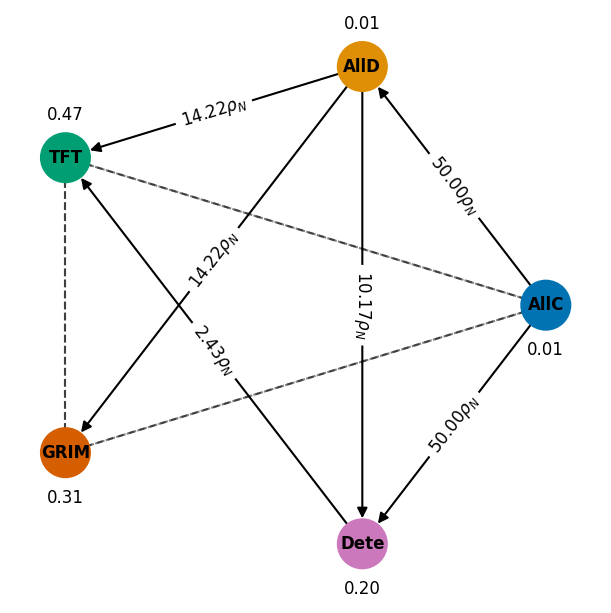

In [32]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_invasion_diagram(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

### Part 2.3: Which strategy(s) are dominant

TFT (or copycat) is the only dominant strategy, since it is the only one which is never invaded by any other strategy

## Part 3: Monte Carlo simulations

In [33]:
Z = 50
beta = 1
nb_generations = 10000000

In [34]:
evolver = egt.numerical.PairwiseComparisonNumerical(Z, game, 100000)

In [35]:
init_state = np.array([10, 10, 10, 10, 10])

In [36]:
sim = evolver.run_without_mutation(nb_generations, beta, init_state)

In [37]:
colors = sns.color_palette("colorblind", len(strategies))

In [38]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', colors)))

### No mutation

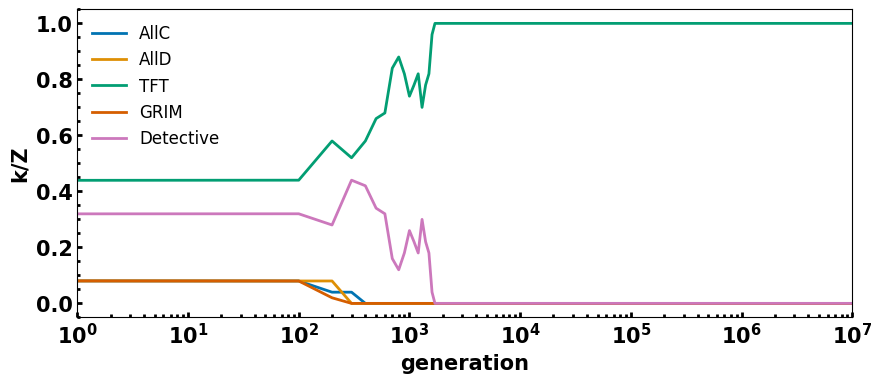

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))

lines = ax.plot(np.arange(nb_generations+1)[::100], sim[::100]/Z)
plt.setp(lines, linewidth=2)

ax.legend([s for s in strategy_labels], frameon=False, fontsize=12)
ax.set_ylabel('k/Z', fontsize=15, fontweight='bold')
ax.set_xlabel('generation', fontsize=15, fontweight='bold')
ax.set_xscale('log')
ax.set_xlim(1, 1e7)

ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', which='both', direction='in', labelsize=15, width=2)
ax.tick_params(axis='y', which='both', direction='in', labelsize=15, width=2)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.show()

### Mutation

In [40]:
mu = 1/Z

In [41]:
sim = evolver.run_with_mutation(nb_generations, beta, mu, init_state)

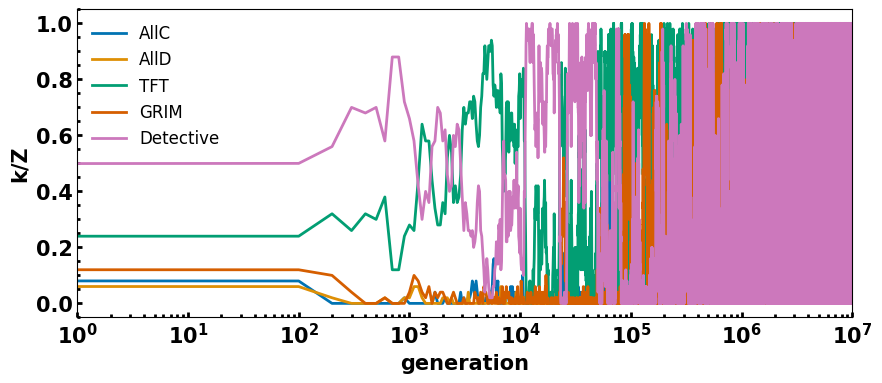

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))

lines = ax.plot(np.arange(nb_generations+1)[::100], sim[::100]/Z)
plt.setp(lines, linewidth=2)

ax.legend([s for s in strategy_labels], frameon=False, fontsize=12)
ax.set_ylabel('k/Z', fontsize=15, fontweight='bold')
ax.set_xlabel('generation', fontsize=15, fontweight='bold')
ax.set_xscale('log')
ax.set_xlim(1, 1e7)

ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', which='both', direction='in', labelsize=15, width=2)
ax.tick_params(axis='y', which='both', direction='in', labelsize=15, width=2)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

plt.show()

## Part 4: Interactions in a scale-free network

In [43]:
from egttools.games import NormalFormNetworkGame
from egttools.numerical.structure import NetworkSync
from egttools.numerical import NetworkEvolver
from egttools.utils import transform_graph_to_dict_of_lists

In [44]:
import networkx as nx
from typing import Dict, List

In [45]:
beta = 10
mu = 0
Z = 9000
k_mean = 4
nb_strategies = 3
cache_size = 100000

In [46]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(),
             egt.behaviors.NormalForm.TwoActions.TFT()]

In [62]:
nb_simulations = int(100)
nb_generations = int(100)

In [63]:
from tqdm import tqdm

In [64]:
graph = nx.barabasi_albert_graph(Z, k_mean // 2)
graph_dictionary = transform_graph_to_dict_of_lists(graph)

game = NormalFormNetworkGame(100, A, strategies)
network = NetworkSync(nb_strategies, beta, mu, graph_dictionary, game, cache_size)

results = []
for i in tqdm(range(nb_simulations)):
    result = NetworkEvolver.run(nb_generations, 0, np.array([3000, 3000, 3000]), network)
    results.append(result)

100%|█████████████████████████████████████████| 100/100 [00:34<00:00,  2.86it/s]


In [65]:
colors = sns.color_palette("icefire", nb_strategies)
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [66]:
results_array = np.asarray(results)

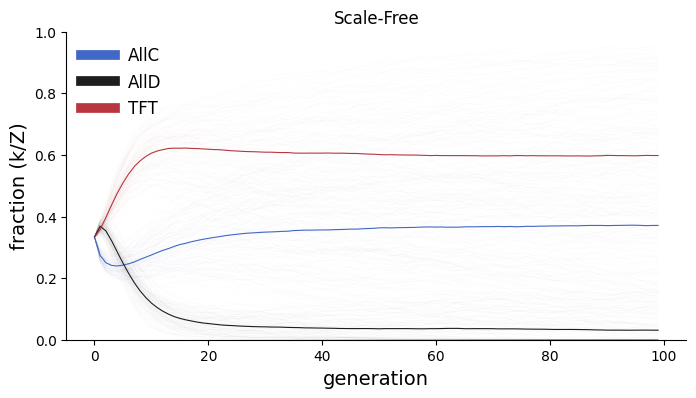

In [67]:
# Plot each year's time series in its own facet
fig, ax = plt.subplots(figsize=(8, 4))

for run in results:
    for i in range(nb_strategies):
        ax.plot(run[:, i] / Z, linewidth=.01, alpha=0.6, color=colors[i])

for i in range(nb_strategies):
    ax.plot(np.mean(results_array[:, :, i] / Z, axis=0), 
            linewidth=.8, 
            alpha=1, color=colors[i], 
            label=strategy_labels[i]) 

ax.set_ylabel('fraction (k/Z)', fontsize=14)
ax.set_xlabel('generation', fontsize=14)
ax.set_ylim(0, 1)
ax.set_title("Scale-Free")
legend = ax.legend(fontsize=12,frameon=False)
# make legend lines thiker
for line in legend.get_lines():
    line.set_linewidth(7)

sns.despine()

### Regular Graph

In [68]:
graph = nx.random_regular_graph(k_mean, Z)
graph_dictionary = transform_graph_to_dict_of_lists(graph)

game = NormalFormNetworkGame(100, A, strategies)
network = NetworkSync(nb_strategies, beta, mu, graph_dictionary, game, cache_size)

results = []
for i in tqdm(range(nb_simulations)):
    result = NetworkEvolver.run(nb_generations, 0, np.array([3000, 3000, 3000]), network)
    results.append(result)

100%|█████████████████████████████████████████| 100/100 [00:22<00:00,  4.42it/s]


In [69]:
results_array = np.asarray(results)

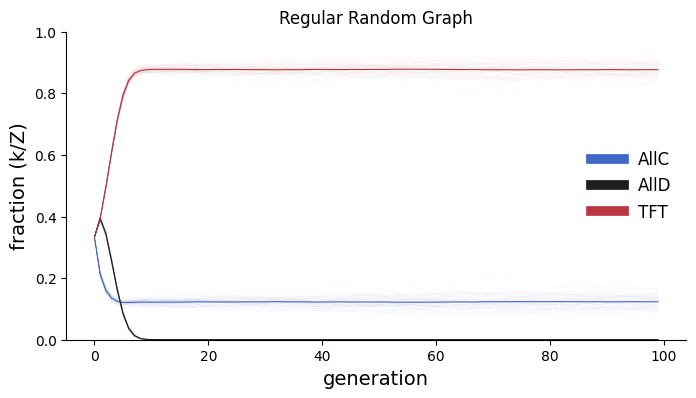

In [70]:
# Plot each year's time series in its own facet
fig, ax = plt.subplots(figsize=(8, 4))

for run in results:
    for i in range(nb_strategies):
        ax.plot(run[:, i] / Z, linewidth=.01, alpha=0.6, color=colors[i])

for i in range(nb_strategies):
    ax.plot(np.mean(results_array[:, :, i] / Z, axis=0), 
            linewidth=.8, 
            alpha=1, color=colors[i], 
            label=strategy_labels[i]) 

ax.set_ylabel('fraction (k/Z)', fontsize=14)
ax.set_xlabel('generation', fontsize=14)
ax.set_ylim(0, 1)
ax.set_title("Regular Random Graph")
legend = ax.legend(fontsize=12,frameon=False)
# make legend lines thiker
for line in legend.get_lines():
    line.set_linewidth(7)

sns.despine()

# Complete graph

In [71]:
Z = 90

In [72]:
graph = nx.complete_graph(Z)
graph_dictionary = transform_graph_to_dict_of_lists(graph)

game = NormalFormNetworkGame(100, A, strategies)
network = NetworkSync(nb_strategies, beta, mu, graph_dictionary, game, cache_size)

results = []
for i in tqdm(range(nb_simulations)):
    result = NetworkEvolver.run(nb_generations, 0, np.array([30, 30, 30]), network)
    results.append(result)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1364.50it/s]


In [73]:
results_array = np.asarray(results)

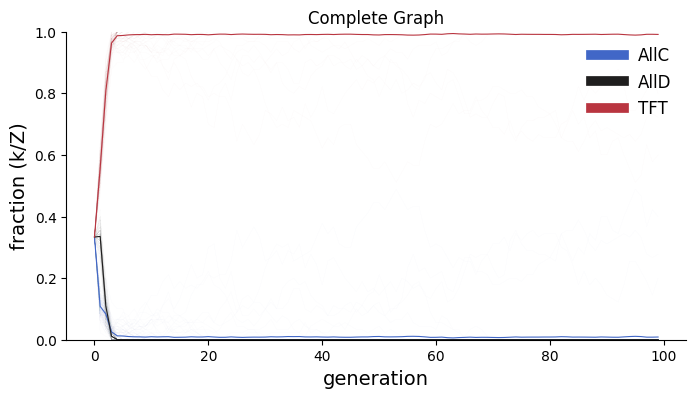

In [74]:
# Plot each year's time series in its own facet
fig, ax = plt.subplots(figsize=(8, 4))

for run in results:
    for i in range(nb_strategies):
        ax.plot(run[:, i] / Z, linewidth=.01, alpha=0.6, color=colors[i])

for i in range(nb_strategies):
    ax.plot(np.mean(results_array[:, :, i] / Z, axis=0), 
            linewidth=.8, 
            alpha=1, color=colors[i], 
            label=strategy_labels[i]) 

ax.set_ylabel('fraction (k/Z)', fontsize=14)
ax.set_xlabel('generation', fontsize=14)
ax.set_ylim(0, 1)
ax.set_title("Complete Graph")
legend = ax.legend(fontsize=12,frameon=False)
# make legend lines thiker
for line in legend.get_lines():
    line.set_linewidth(7)

sns.despine()

### Well-Mixed

The well-mixed simulations should match the results of the complete graph, with the caveat the the complete graph simulations are done using the NetworkSync structure which makes synchronous updates to the population, while the well-mixed simulations are asynchronous. Nevertheless, if run for enough generations (many more than the complete graph simulations) the convergence should be the same.

In [75]:
Z = 90

In [76]:
initial_state = np.full(shape=(len(strategies),), fill_value=Z // 3, dtype=np.uint64)

In [80]:
game = egt.games.NormalFormGame(100, A, strategies)
evolver = egt.numerical.PairwiseComparisonNumerical(Z, game, 100000)

results_well_mixed = []
for i in tqdm(range(100)):
    result = evolver.run_without_mutation(10000, beta, initial_state)
    results_well_mixed.append(result)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 153.60it/s]


In [81]:
results_array = np.asarray(results_well_mixed)

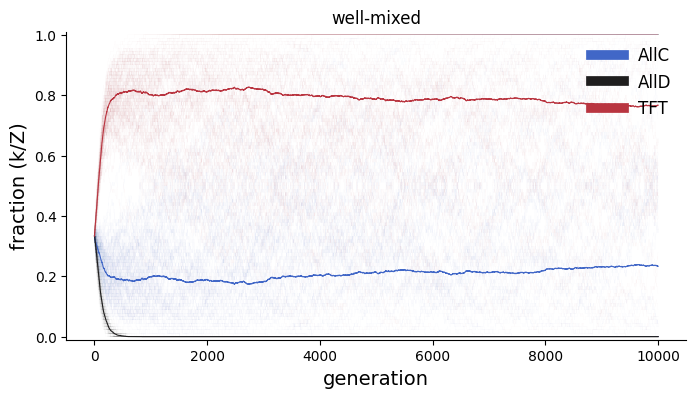

In [82]:
# Plot each year's time series in its own facet
fig, ax = plt.subplots(figsize=(8, 4))

for run in results_well_mixed:
    for i in range(nb_strategies):
        ax.plot(run[:, i] / Z, linewidth=.01, alpha=0.6, color=colors[i])

for i in range(nb_strategies):
    ax.plot(np.mean(results_array[:, :, i] / Z, axis=0), 
            linewidth=.8, 
            alpha=1, color=colors[i], 
            label=strategy_labels[i]) 

ax.set_ylabel('fraction (k/Z)', fontsize=14)
ax.set_xlabel('generation', fontsize=14)
ax.set_ylim(-0.01, 1.01)
ax.set_title("well-mixed")
legend = ax.legend(fontsize=12,frameon=False)
# make legend lines thiker
for line in legend.get_lines():
    line.set_linewidth(7)

sns.despine()
plt.show()